In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\orteg\AppData\Local\Temp\ipykernel_24864\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Persons

In [2]:
name_basic = pd.read_csv('Data/name-basics.tsv', sep='\t')

In [3]:
name_basic.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0031983,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"


In [4]:
name_basic.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,13221794,13221787,13221794,13221794,10567492,13221794
unique,13221794,10202708,529,471,21690,5596976
top,nm0000001,Alex,\N,\N,actor,\N
freq,1,466,12617124,12996973,2384332,1541476


In [5]:
name_basic['birthYear'] = pd.to_numeric(name_basic['birthYear'], errors='coerce')
name_basic['deathYear'] = pd.to_numeric(name_basic['deathYear'], errors='coerce')

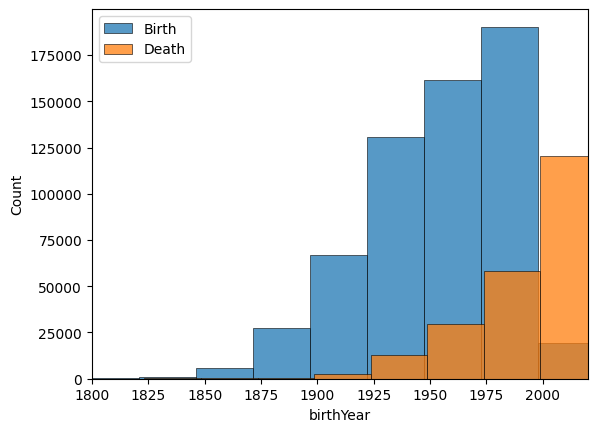

In [6]:
sns.histplot(name_basic['birthYear'], bins=80, label='Birth')
sns.histplot(name_basic['deathYear'], bins=80, label='Death')
plt.xlim(1800, 2020)
plt.legend()
plt.show()

In [7]:
#proportion of actors
name_basic['primaryProfession'] = name_basic['primaryProfession'].str.split(',')
name_basic['primaryProfession'] = name_basic['primaryProfession'].fillna('')
name_basic['IsActor'] = name_basic['primaryProfession'].apply(lambda x: 'actor' in x)
name_basic['IsActor']

0            True
1           False
2           False
3            True
4            True
            ...  
13221789    False
13221790    False
13221791    False
13221792    False
13221793    False
Name: IsActor, Length: 13221794, dtype: bool

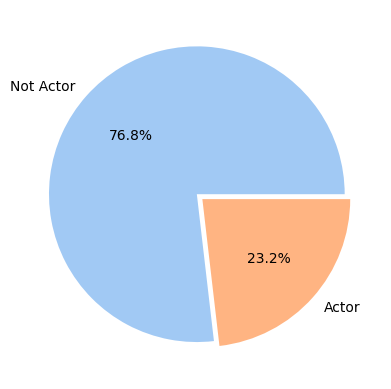

In [10]:
colors = sns.color_palette("pastel")[:2]
plt.pie(name_basic['IsActor'].value_counts(), labels=['Not Actor', 'Actor'], colors=colors, autopct='%1.1f%%', explode=(0, 0.05))
plt.show()

## Akas

In [11]:
akas = pd.read_csv('Data/title-akas.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_24864\1207360960.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv('Data/title-akas.tsv', sep='\t')


In [12]:
akas.head(3)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0


In [16]:
akas[akas.columns.difference(["ordering"])].describe()

,attributes,isOriginalTitle,language,region,title,titleId,types
count,38576732,38576732,38576732,38576615,38576714,38576732,38576732
unique,187,5,108,248,4509809,7538269,24
top,\N,0,\N,JP,Episodio #1.1,tt0088814,\N
freq,38303491,23640442,6913801,4637497,100294,251,32771508


## title-basic

## title-crew